In [6]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from IPython.display import Markdown, display
from scipy import stats

def printmd(string):
    display(Markdown(string))


# import consumption deviation data from 2013

In [7]:
data = pd.read_excel("consumption deviation 2013.xlsx", usecols=["Datum","Consumption deviation (MW)"])
data.columns = ["date","consumption_dev"]
data.date = data.date.map(lambda x:x.to_pydatetime())
data.date = data.date.map(lambda x:datetime.date(year=x.year,month=x.month,day=x.day))

In [8]:
data.head()

,date,consumption_dev
0,2013-01-01,43.2782
1,2013-01-01,66.6774
2,2013-01-01,45.7494
3,2013-01-01,-0.9942
4,2013-01-01,134.4006


# import daily weather data over a range of years

In [10]:
# extract only date and temperature
weather = pd.read_csv("produkt_klima_tag_19470101_20161231_00320.txt",sep=";",usecols=["MESS_DATUM"," TMK"])
weather.columns = ["date","temp"]

In [11]:
weather.head()

,date,temp
0,19470101,-4.0
1,19470102,-2.6
2,19470103,-2.9
3,19470104,-10.6
4,19470105,-14.2


# process data

In [12]:
# parser to extract date from integer and export it into a datetime object
def parseDate(date):
  date  = str(date)
  y = int(date[:4])
  m = int(date[4:6])
  d = int(date[6:8])
  return datetime.date(year=y,month=m,day=d)

In [13]:
weather.date = weather.date.map(parseDate)

In [14]:
# select weather for the year 2013
weather2013 = weather[(weather.date >= datetime.date(year=2013,month=1,day=1)) & (weather.date <= datetime.date(year=2013,month=12,day=31))]
# select weather for the past 5 years
weather = weather[(weather.date >= datetime.date(year=2008,month=1,day=1)) & (weather.date <= datetime.date(year=2012,month=12,day=31))]
weather = weather.reset_index(drop=True)
weather2013 = weather2013.reset_index(drop=True)

In [15]:
weather2013.head()

,date,temp
0,2013-01-01,2.8
1,2013-01-02,2.6
2,2013-01-03,3.2
3,2013-01-04,7.7
4,2013-01-05,7.1


In [16]:
weather.head()

,date,temp
0,2008-01-01,-0.8
1,2008-01-02,-2.8
2,2008-01-03,-2.5
3,2008-01-04,-1.9
4,2008-01-05,-0.9


# plots 

## daily median consumptions deviation over 2013

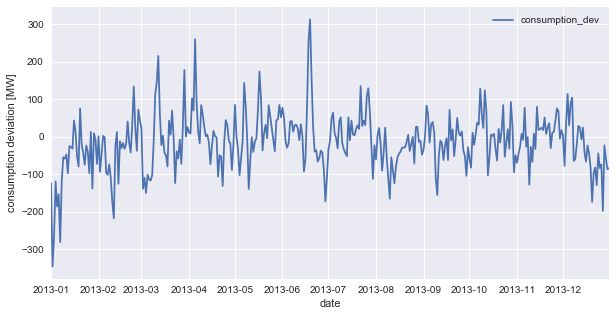

In [24]:
%matplotlib inline

data.groupby("date").median().plot(figsize=(10,5));
plt.ylabel("consumption deviation [MW]")
plt.savefig("consumption_dev_2013.png")

## standart deviation of daily consumption deviation

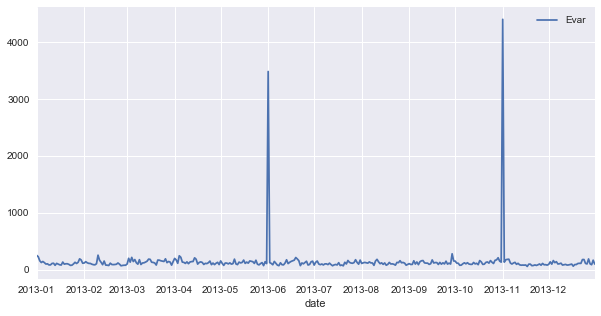

In [723]:
data.groupby("date").std().plot(figsize=(10,5));

In [519]:
#data.groupby("date").mean().rolling(7,win_type="gaussian").mean(std=1).plot(figsize=(10,5))

In [520]:
#data.groupby("date").median().boxplot(figsize=(10,15))

## median daily temperature deviation with std interval from the past 5 years

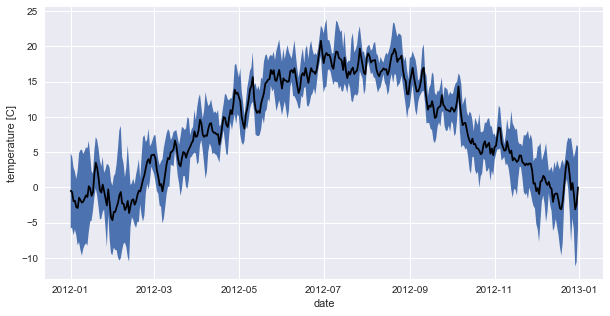

In [30]:
weather.date = weather.date.map(lambda x:datetime.date(year=2012,month=x.month,day=x.day))
weather = weather.drop(weather[weather.date == datetime.date(year=2012,month=2,day=29)].index)
weather2013.date = weather2013.date.map(lambda x:datetime.date(year=2013,month=x.month,day=x.day))
#weather2013 = weather2013.drop(weather2013[weather2013.date == datetime.date(year=2013,month=2,day=29)].index)
x = weather.groupby("date").mean().index
t = weather.groupby("date").mean().as_matrix().flatten()
std = weather.groupby("date").std().as_matrix().flatten()
fig, ax = plt.subplots(1,1,figsize=(10,5))
plt.plot(x, t, 'k-')
plt.fill_between(x,t-std,t+std)
plt.xlabel("date")
plt.ylabel("temperature [C]")
plt.savefig("temperature_vs_date.png");

In [588]:
#d = weather2013.temp.as_matrix() - weather.groupby("date").median().temp.as_matrix()
#plt.plot(d,data.groupby("date").median(),"o")

In [584]:
#from scipy.stats import pearsonr

#pearsonr(d.flatten(),data.groupby("date").median().as_matrix())

In [585]:
#plt.plot(weather2013.temp, data.groupby("date").median(),"o")
#pearsonr(weather2013.temp.as_matrix().flatten(),data.groupby("date").median().as_matrix().flatten())

# seasonal data 

## prepare data

In [31]:
summer2013 = weather2013[(mediancons.index >= datetime.date(year=2013,month=6,day=1)) & (mediancons.index <= datetime.date(year=2013,month=8,day=31))]
spring2013 = weather2013[(mediancons.index >= datetime.date(year=2013,month=3,day=1)) & (mediancons.index <= datetime.date(year=2013,month=5,day=31))]
autumn2013 = weather2013[(mediancons.index >= datetime.date(year=2013,month=9,day=1)) & (mediancons.index <= datetime.date(year=2013,month=11,day=30))]
winter2013 = weather2013[(mediancons.index <= datetime.date(year=2013,month=2,day=28)) | (mediancons.index >= datetime.date(year=2013,month=12,day=1))]

In [32]:
mediancons = data.groupby("date").median()
summercons = mediancons[(mediancons.index >= datetime.date(year=2013,month=6,day=1)) & (mediancons.index <= datetime.date(year=2013,month=8,day=31))]
springcons = mediancons[(mediancons.index >= datetime.date(year=2013,month=3,day=1)) & (mediancons.index <= datetime.date(year=2013,month=5,day=31))]
autumncons = mediancons[(mediancons.index >= datetime.date(year=2013,month=9,day=1)) & (mediancons.index <= datetime.date(year=2013,month=11,day=30))]
wintercons = mediancons[(mediancons.index <= datetime.date(year=2013,month=2,day=28)) | (mediancons.index >= datetime.date(year=2013,month=12,day=1))]

## plot consumption deviation vs temperature with respect to seasons

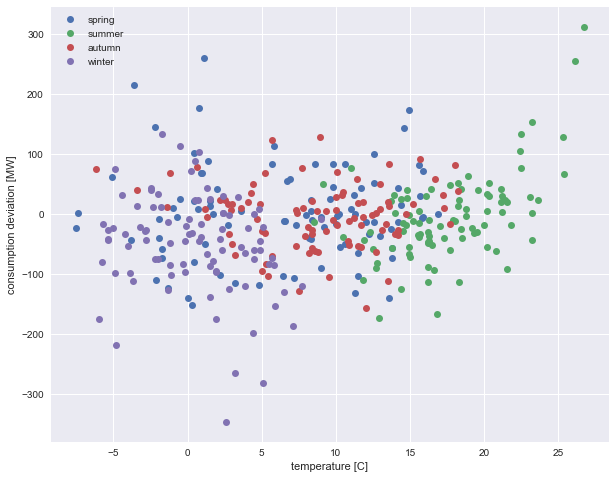

In [33]:
plt.subplots(1,1,figsize=(10,8))
sp, = plt.plot(spring2013.temp,springcons,"o",label="spring")
su, = plt.plot(summer2013.temp,summercons,"o",label="summer")
au, = plt.plot(autumn2013.temp,autumncons,"o",label="autumn")
wi, = plt.plot(winter2013.temp,wintercons,"o",label="winter")
plt.xlabel("temperature [C]")
plt.ylabel("consumption deviation [MW]")
plt.legend(handles=[sp,su,au,wi]);
plt.savefig("consumption_deviation_vs_temperature.png");

## boxplot of consumption deviation with respect to seasons

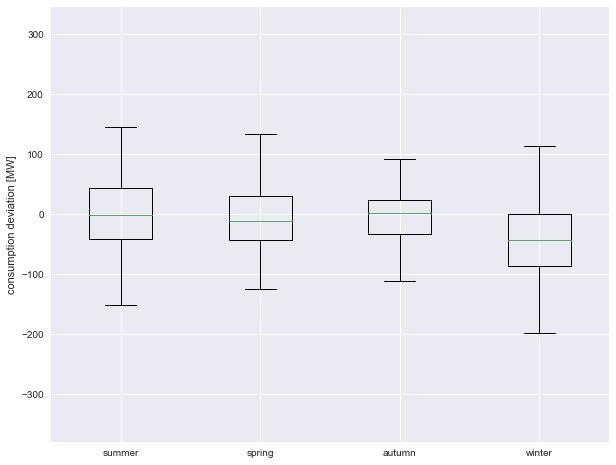

In [34]:
plt.subplots(1,1,figsize=(10,8))
plt.boxplot([springcons,summercons,autumncons,wintercons]);
plt.ylabel("consumption deviation [MW]");
plt.xticks([1,2,3,4],["summer","spring","autumn","winter"]);
plt.savefig("boxplot_consumption_deviation.png")

## seasonal median consumption deviation

In [36]:
printmd("**Median consumption deviation**")
printmd("**{} MW, {} MW, {} MW, {} MW**".format(round(springcons.median()[0],2),
                                       round(summercons.median()[0],2),
                                        round(autumncons.median()[0],2),
                                       round(wintercons.median()[0]),2))

**Median consumption deviation**

**-1.69 MW, -11.86 MW, 2.87 MW, -42.0 MW**

## compute temperature deviation from weather from 2013 and forecasted temperature (median from past 5 years)

In [37]:
forecastdev = weather2013.temp.as_matrix().flatten() - weather.groupby("date").median().temp.as_matrix().flatten()
forecastdevsummer = forecastdev[(mediancons.index >= datetime.date(year=2013,month=6,day=1)) & (mediancons.index <= datetime.date(year=2013,month=8,day=31))]
forecastdevspring = forecastdev[(mediancons.index >= datetime.date(year=2013,month=3,day=1)) & (mediancons.index <= datetime.date(year=2013,month=5,day=31))]
forecastdevautumn = forecastdev[(mediancons.index >= datetime.date(year=2013,month=9,day=1)) & (mediancons.index <= datetime.date(year=2013,month=11,day=30))]
forecastdevwinter = forecastdev[(mediancons.index <= datetime.date(year=2013,month=2,day=28)) | (mediancons.index >= datetime.date(year=2013,month=12,day=1))]

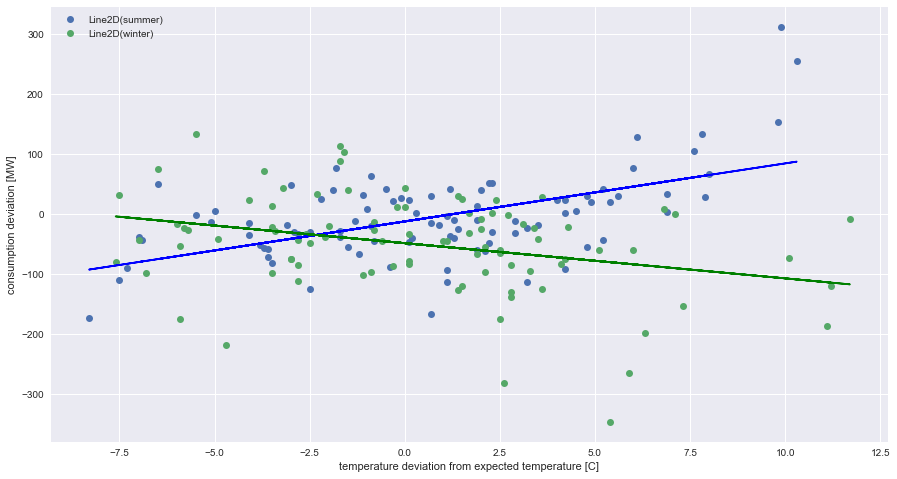

In [38]:
fitsu = np.polyfit(forecastdevsummer,summercons.as_matrix().flatten(),1)
fitwi = np.polyfit(forecastdevwinter,wintercons.as_matrix().flatten(),1)

fnsu = np.poly1d(fitsu) 
fnwi = np.poly1d(fitwi) 

plt.subplots(1,1,figsize=(15,8))
legsu, = plt.plot(forecastdevsummer, summercons,"o", label="summer")
legwi, = plt.plot(forecastdevwinter, wintercons,"o", label="winter")
plt.plot(forecastdevsummer,fnsu(forecastdevsummer),"b-")
plt.plot(forecastdevwinter,fnwi(forecastdevwinter),"g-")
plt.xlabel("temperature deviation from expected temperature [C]")
plt.ylabel("consumption deviation [MW]")
plt.legend([legsu,legwi]);
plt.savefig("consumption_deviation_vs_temperature_deviation.png")

## compute confidence interval of regression

** 60.57 in summer, 102.89 in winter **

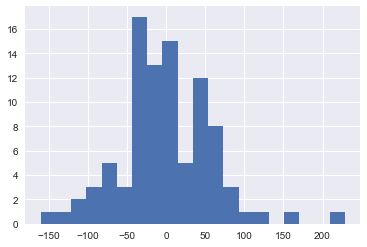

In [751]:
err_su = summercons.as_matrix().flatten() - fnsu(forecastdevsummer)
err_wi = wintercons.as_matrix().flatten() - fnsu(forecastdevwinter)
plt.hist(err,bins=20);
sigma_su = np.std(err_su)
sigma_wi = np.std(err_wi)
printmd("** {} in summer, {} in winter **".format(round(sigma_su,2),round(sigma_wi,2)))

## slope from linear regression (consumption deviation per degree celsius of deviation from real temperature)

In [747]:
printmd("**{} +- 60 MW/C in summer, {} +- 102 MW/C in winter (CI 68%)**".format(round(fnsu[1],2),round(fnwi[1],2)))

**9.67 +- 60 MW/C in summer, -5.86 +- 102 MW/C in winter (CI 68%)**

## pearsonr correlation factors

In [749]:
psu, _ = pearsonr(forecastdevsummer,summercons.as_matrix().flatten())
pwi, _ = pearsonr(forecastdevwinter,wintercons.as_matrix().flatten())
printmd("**{} pearsonr in summer, {} pearsonr in winter**".format(round(psu,2),round(pwi,2)))

**0.56 pearsonr in summer, -0.31 pearsonr in winter**